# Self Organizing Maps - Lab 6 A)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
grid_size = (10, 10)  
input_dim = 1
learning_rate = 0.03
sigma = 2
epochs = 2000


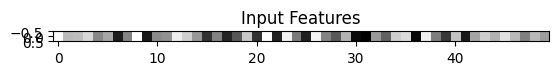

In [25]:
data = np.random.rand(50, 1)
plt.imshow(data.reshape(1, 50), cmap="binary")  # Force grayscale
plt.title("Input Features")
plt.show()

In [33]:
weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

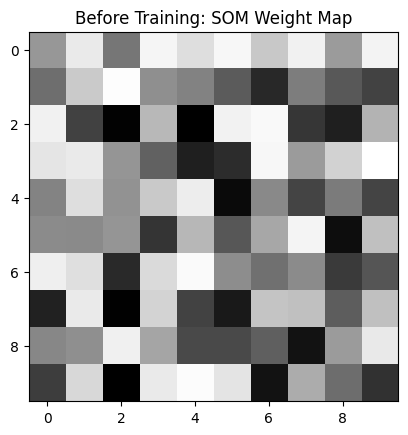

In [34]:
plt.imshow(weights.reshape(grid_size[0], grid_size[1]), cmap="Grays")  # Force grayscale
plt.title("Before Training: SOM Weight Map")
plt.show()

In [28]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [29]:
for epoch in range(epochs):
    for sample in data:
        # Find the Best Matching Unit (BMU)
        distances = np.linalg.norm(weights - sample, axis=2)
        bmu_idx = np.unravel_index(np.argmin(distances), grid_size)

        # Update weights using neighborhood function
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                dist_to_bmu = euclidean_distance(np.array([i, j]), np.array(bmu_idx))
                influence = np.exp(-dist_to_bmu**2 / (2 * sigma**2))
                weights[i, j] += learning_rate * influence * (sample - weights[i, j])

    # Decay learning rate & neighborhood size
    learning_rate *= 0.99
    sigma *= 0.99


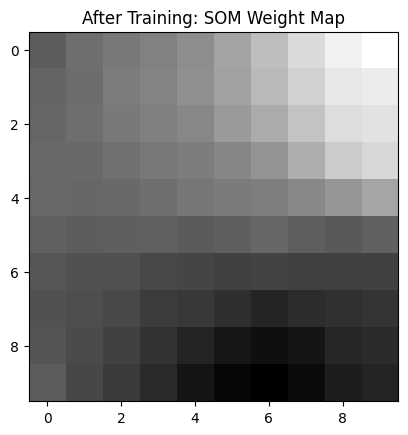

In [30]:
plt.imshow(weights.reshape(grid_size[0], grid_size[1]), cmap="gray")  # Force grayscale
plt.title("After Training: SOM Weight Map")
plt.show()

# 6B) Back-Propogation for RNN with temporal operation as a parameter

In [134]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)  

In [135]:
input_dim = 2  
hidden_size = 3  
output_dim = 1  
time_steps = 3 
learning_rate = 0.1

In [136]:
X_train = np.random.randn(100, time_steps, input_dim, 1) * 0.1  # 100 samples
Y_train = np.random.randn(100, output_dim, 1) * 0.1  # 100 labels

In [152]:
w_x_to_h = np.random.randn(hidden_size, input_dim) * 0.1
w_h_to_h = np.random.randn(hidden_size, hidden_size) * 0.01
w_h_to_y = np.random.randn(output_dim, hidden_size) * 0.01
b_hidden = np.zeros((hidden_size, 1))
b_output = np.zeros((output_dim, 1))

In [153]:
epochs = 1000
Loss, acc= [], 0
for epoch in range(epochs):
    epoch_loss = 0.0
    for sample_idx in range(len(X_train)):  # Process each sample separately
        x_sample = X_train[sample_idx]  # Shape: (time_steps, input_dim, 1)
        y_true = Y_train[sample_idx]  # Shape: (output_dim, 1)
        
        # Forward Pass (Unrolling through time)
        h_t = np.zeros((hidden_size, 1))
        hs = []
        for t in range(time_steps):
            x_t = x_sample[t]  # Select input for this time step
            h_t = sigmoid(np.dot(w_x_to_h, x_t) + np.dot(w_h_to_h, h_t) + b_hidden)
            hs.append(h_t)

        # Compute final output
        y_pred = sigmoid(np.dot(w_h_to_y, h_t) + b_output)
        
        # Compute loss
        loss = 0.5 * (y_true - y_pred) ** 2
        epoch_loss += loss
        if y_true == y_pred:
            acc+=1
        # Backpropagation Through Time (BPTT)
        dw_h_to_y = np.zeros_like(w_h_to_y)
        dw_h_to_h = np.zeros_like(w_h_to_h)
        dw_x_to_h = np.zeros_like(w_x_to_h)
        db_hidden = np.zeros_like(b_hidden)
        db_output = np.zeros_like(b_output)

        # Compute gradients
        dy = (y_pred - y_true) * sigmoid_derivative(y_pred)
        dw_h_to_y += dy @ hs[-1].T  # Fixed shape issue
        db_output += dy
        dh_next = np.dot(w_h_to_y.T, dy)

        for t in reversed(range(time_steps)):
            dh = dh_next * sigmoid_derivative(hs[t])
            db_hidden += dh
            dw_x_to_h += dh @ x_sample[t].T  # Fix shape issue with @ operator
            if t > 0:
                dw_h_to_h += dh @ hs[t-1].T
            dh_next = np.dot(w_h_to_h.T, dh)

        # Gradient Descent Update
        w_x_to_h -= learning_rate * dw_x_to_h
        w_h_to_h -= learning_rate * dw_h_to_h
        w_h_to_y -= learning_rate * dw_h_to_y
        b_hidden -= learning_rate * db_hidden
        b_output -= learning_rate * db_output
    Loss.append(epoch_loss[0][0])

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {epoch_loss[0][0]:.4f}")


print("Training Complete.")

Epoch 0: Loss = 6.7289
Epoch 100: Loss = 0.5201
Epoch 200: Loss = 0.5083
Epoch 300: Loss = 0.5042
Epoch 400: Loss = 0.5021
Epoch 500: Loss = 0.5008
Epoch 600: Loss = 0.5000
Epoch 700: Loss = 0.4994
Epoch 800: Loss = 0.4989
Epoch 900: Loss = 0.4986
Training Complete.


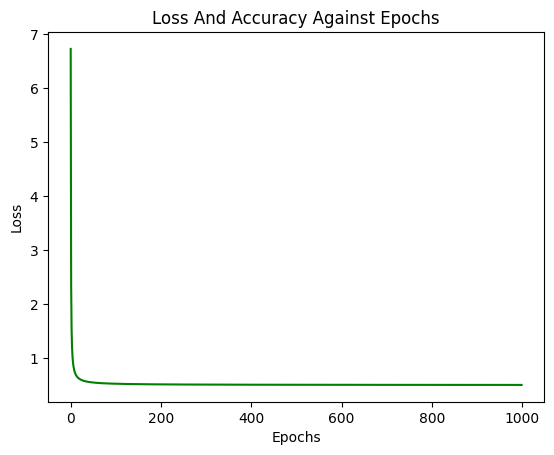

In [154]:
plt.plot([i for i in range(len(Loss))],Loss,color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss And Accuracy Against Epochs")
plt.show()